## Can Gözpınar 68965
### Engr421 Homework #4

### divide the dataset

In [615]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [616]:
#read in data points
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")[1:,:] #remove the first x,y string
#first 100 to training set
trainingDataSet = data_set[:100,:] #(100,2)
#remaining 33 to test set
testDataSet = data_set[100:,:] #(33,2)

### Drawing Parameters

In [617]:
minimum_value = 0
maximum_value = 60
data_interval = np.linspace(minimum_value, maximum_value, 6001) #to be used as x-axis

### Learn a regrossogram

In [618]:
#set parameters for regrossogram algorithm
bin_width = 3
N = trainingDataSet.shape[0]
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)

binSums = np.zeros(len(left_borders)) #sums of y values in a bin
binK = np.zeros(len(left_borders))#number of x elements in a bin
for i in range(len(left_borders)): #do for each bin
    #if (left_borders[b] < trainingDataSet[:,0] & trainingDataSet[:,0] <= right_borders[b]): # x is in bin
    for j in range(len(trainingDataSet[:,0])):
        if left_borders[i] < trainingDataSet[j,0] and right_borders[i] >= trainingDataSet[j,0]:
            binSums[i] = binSums[i] + trainingDataSet[j,1]      
            binK[i] = binK[i] +1  #calculate N in a given bin 

p_hat = binSums / binK #p hat values for bins 


### Draw the Regrossogram

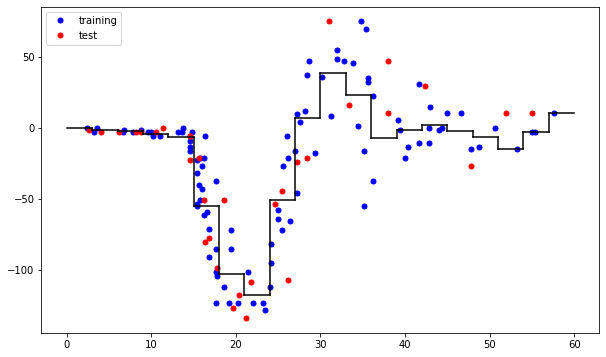

In [619]:
#plot training data on the plot
plt.figure(figsize = (10,6))

plt.plot(trainingDataSet[:,0], trainingDataSet[:,1], "b.", markersize = 10, label="training")#training
plt.plot(testDataSet[:,0], testDataSet[:,1], "r.", markersize = 10, label="test")#test set 

#draw p_hat
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")  

plt.legend(loc = "upper left")
plt.show()

### RMSE Error for regrossogram

In [620]:
#calculating RMSE Error for the regrossogram for testDataSet
rmseSum = 0 #sum over N
rmseN = testDataSet.shape[0] #N value

for i in range(len(left_borders)): #do for each bin
    for j in range(len(testDataSet[:,0])):
        if left_borders[i] < testDataSet[j,0] and right_borders[i] >= testDataSet[j,0]:
            rmseSum = rmseSum + (testDataSet[j,1] - p_hat[i])**2

rmse = np.sqrt(rmseSum / rmseN) #sqrt of sum over N over N
print("Regrossogram => RMSE is {} when h is {}".format(rmse, binWidth))
        


Regrossogram => RMSE is 24.725997719599924 when h is 3


### Running Mean Smoother

In [621]:
#running mean smoother
bin_width = 3
N = 0
#p_hat = np.asarray([trainingDataSet[:,1] * np.sum(((x - 0.5 * bin_width) < trainingDataSet[:,0]) & ##(trainingDataSet[:,0] <= (x + 0.5 * bin_width))) for x in data_interval]) / (N * bin_width) 

p_hat = np.zeros(len(data_interval)) #initialize with zero values
#apply the formula for running mean smoother using loops below
for i in range(len(data_interval)):
    for j in range(len(trainingDataSet[:,0])):
        if ((data_interval[i] - 0.5 * bin_width) < trainingDataSet[j,0]) and (trainingDataSet[j,0] <= (data_interval[i] + 0.5 * bin_width)):
            p_hat[i] = p_hat[i] + trainingDataSet[j,1]
            N += 1
    if N > 0: #to prevent divison by zero
        p_hat[i] = p_hat[i] / (N)
    N = 0


### Plot Running Mean Smoother

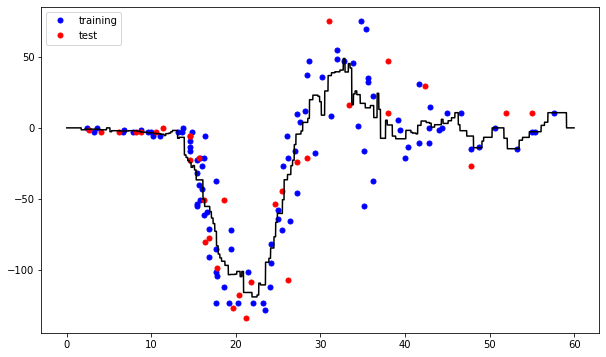

In [622]:
#plot running mean smoother
plt.figure(figsize = (10,6))

plt.plot(trainingDataSet[:,0], trainingDataSet[:,1], "b.", markersize = 10, label="training")#training
plt.plot(testDataSet[:,0], testDataSet[:,1], "r.", markersize = 10, label="test")#test set 

#draw p_hat
plt.plot(data_interval, p_hat, "k-")

plt.legend(loc = "upper left")
plt.show()

### Calculate the RMSE for Running Mean Smoother

In [623]:
#calculate the RMSE for running mean smoother
rmseSum = 0 #sum over N
rmseN = testDataSet.shape[0] #N value

for i in range(len(data_interval)): #do for each bin
    for j in range(len(testDataSet[:,0])):
        if data_interval[i] < testDataSet[j,0] and data_interval[i+1] >= testDataSet[j,0]:
            rmseSum = rmseSum + (testDataSet[j,1] - p_hat[i+1])**2


rmse = np.sqrt(rmseSum / rmseN) #sqrt of sum over N over N
print("Regrossogram => RMSE is {} when h is {}".format(rmse, binWidth))     

Regrossogram => RMSE is 23.840322905172517 when h is 3


### Learn a Kernel Smoother

In [624]:
#learn a kernel Smoother
bin_width = 1

denominatorTerm = 0
p_hat = np.zeros(len(data_interval)) #initialize with zero values

#apply the formula for running mean smoother using loops below
for i in range(len(data_interval)):
    for j in range(len(trainingDataSet[:,0])):
            k = np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (data_interval[i] - trainingDataSet[j,0])**2 / bin_width**2))
            p_hat[i] = p_hat[i] + (k * trainingDataSet[j,1])
            denominatorTerm += k
    if denominatorTerm > 0: #to prevent divison by zero
        p_hat[i] = p_hat[i] / (denominatorTerm)
    denominatorTerm = 0



### Plot Kernel Smoother

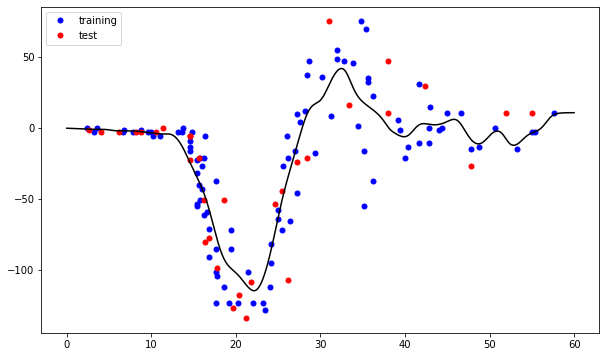

In [625]:
#plot kernel smoother
plt.figure(figsize = (10,6))

plt.plot(trainingDataSet[:,0], trainingDataSet[:,1], "b.", markersize = 10, label="training")#training
plt.plot(testDataSet[:,0], testDataSet[:,1], "r.", markersize = 10, label="test")#test set 

#draw p_hat
plt.plot(data_interval, p_hat, "k-")

plt.legend(loc = "upper left")
plt.show()

### RMSE of Kernel Smoother

In [626]:
#calculating RMSE for Kernel Smoother
rmseSum = 0 #sum over N
rmseN = testDataSet.shape[0] #N value

for i in range(len(data_interval)): #do for each bin
    for j in range(len(testDataSet[:,0])):
        if data_interval[i] < testDataSet[j,0] and data_interval[i+1] >= testDataSet[j,0]:
            rmseSum = rmseSum + (testDataSet[j,1] - p_hat[i+1])**2


rmse = np.sqrt(rmseSum / rmseN) #sqrt of sum over N over N
print("Regrossogram => RMSE is {} when h is {}".format(rmse, binWidth))     

Regrossogram => RMSE is 24.16724626646939 when h is 3
